In [2]:
!nvidia-smi

Wed Jan 15 16:03:12 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
#import os
#HOME = os.getcwd()
from google.colab import drive
drive.mount('/content/drive/')
HOME = "/content/drive/MyDrive/FinalProject/"
print(HOME)
import os
os.chdir(HOME)
!ls

# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/235.7 GB disk)


In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


/content
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # lo

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i5gRRYo5NZK5P9Z7au3K")
project = rf.workspace("firedetectiondataset-me1pp").project("firedetectiondataset-wiuc4")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OWsJs1uL49xxDsSsdkbW")
project = rf.workspace("firedetectormono").project("firedetectormono")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to firedetectormono-2 in yolov5pytorch:: 100%|██████████| 596/596 [00:04<00:00, 140.16it/s]


In [14]:
!pwd
!ls
!pip install Pillow
# DATASET = "/content/drive/MyDrive/FinalProject/FireDetectionDataset/"
DATASET = "/content/drive/MyDrive/FinalProject/firedetectormono/"

%cd {DATASET}

!pwd

!yolo task=detect mode=train model=yolov8s.pt data="./data.yaml" epochs=4 imgsz=800 plots=True

/content/drive/MyDrive/FinalProject/firedetectormono
data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8s.pt
/content/drive/MyDrive/FinalProject/firedetectormono
/content/drive/MyDrive/FinalProject/firedetectormono
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you st

In [16]:

%cd {HOME}

!pwd
!ls
!pip install Pillow
# DATASET = "/content/drive/MyDrive/FinalProject/FireDetectionDataset/"
DATASET = "/content/drive/MyDrive/FinalProject/firedetectormono/"

%cd {DATASET}

!pwd

!yolo task=detect mode=val model={DATASET}/runs/detect/train5/weights/best.pt data=./data.yaml

/content/drive/MyDrive/FinalProject
/content/drive/MyDrive/FinalProject
dog.jpeg	      FireDetectionDataset-1  frames.zip  yolov8n.pt
FireDetectionDataset  firedetectormono	      runs	  yolov8s.pt
/content/drive/MyDrive/FinalProject/firedetectormono
/content/drive/MyDrive/FinalProject/firedetectormono
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `to

In [18]:

%cd {HOME}

!pwd
!ls
!pip install Pillow
# DATASET = "/content/drive/MyDrive/FinalProject/FireDetectionDataset/"
DATASET = "/content/drive/MyDrive/FinalProject/firedetectormono/"

%cd {DATASET}
!yolo task=detect mode=predict model={DATASET}/runs/detect/train5/weights/best.pt conf=0.25 source={DATASET}/test/images save=True


/content/drive/MyDrive/FinalProject
/content/drive/MyDrive/FinalProject
dog.jpeg	      FireDetectionDataset-1  frames.zip  yolov8n.pt
FireDetectionDataset  firedetectormono	      runs	  yolov8s.pt
/content/drive/MyDrive/FinalProject/firedetectormono
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you

/content/drive/MyDrive/FinalProject
/content/drive/MyDrive/FinalProject
dog.jpeg	      FireDetectionDataset-1  frames.zip  yolov8n.pt
FireDetectionDataset  firedetectormono	      runs	  yolov8s.pt


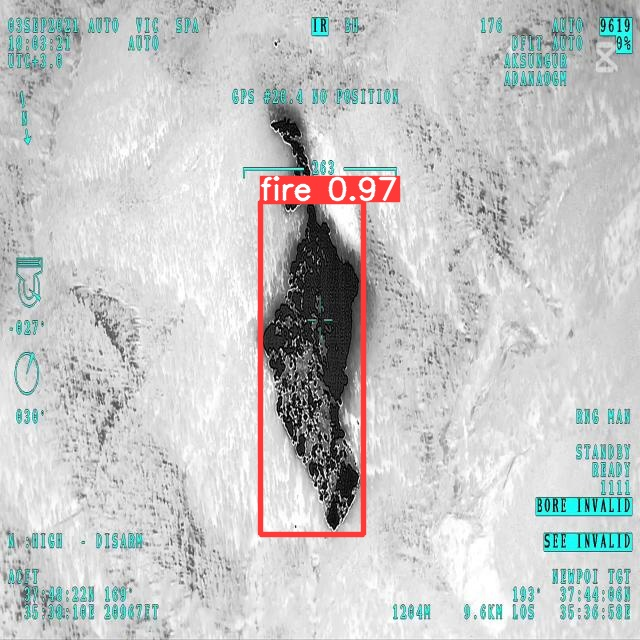

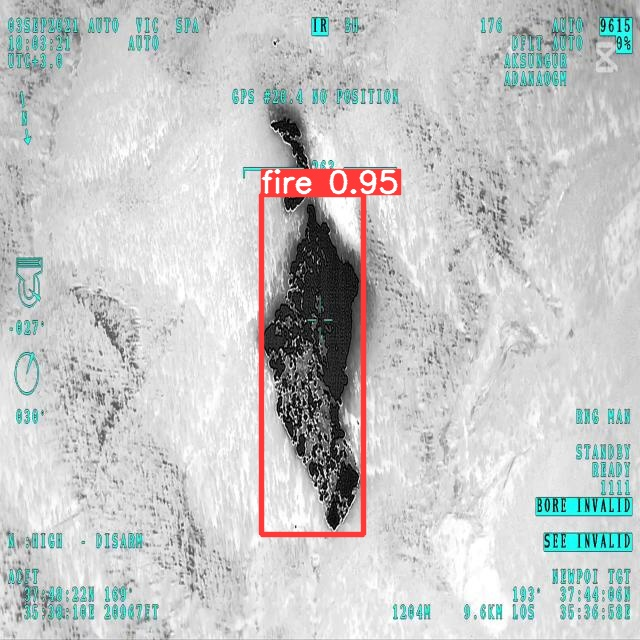

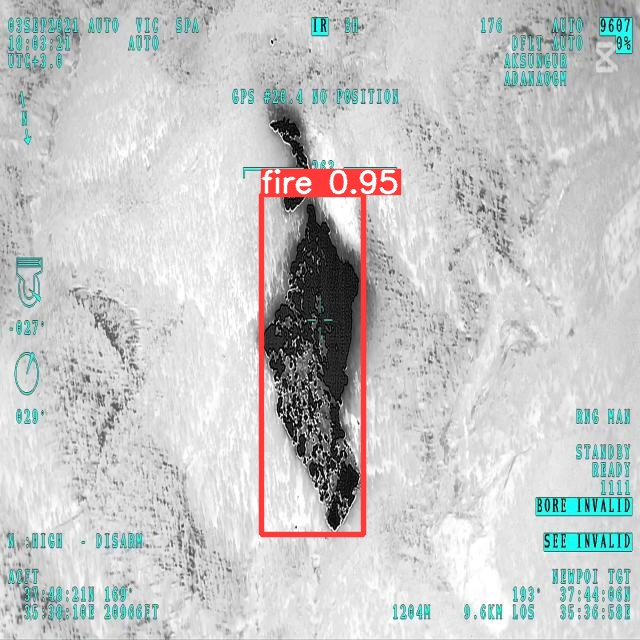

In [19]:

import glob
from IPython.display import Image, display

%cd {HOME}

!pwd
!ls
!pip install Pillow
# DATASET = "/content/drive/MyDrive/FinalProject/FireDetectionDataset/"
DATASET = "/content/drive/MyDrive/FinalProject/firedetectormono/"

for image_path in glob.glob(f'{DATASET}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")